<a href="https://colab.research.google.com/github/WWCode-SV/Python_for_Data_Analysis/blob/master/Titanic%20Survival%20Prediction%20Project/Titanic_Prediction_Project_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 3: Descriptive Statistics


In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Reading data (should be replaced with the path and name of your files.)

In [2]:
import pandas as pd #pandas for reading input csv file and other pandas functions

# Read the data
X_full = pd.read_csv('/content/gdrive/My Drive/Python for Data Analysis Data Science/Titanic Survival Prediction Project/data/train.csv', 
                     index_col='PassengerId')
X_test_full = pd.read_csv('/content/gdrive/My Drive/Python for Data Analysis Data Science/Titanic Survival Prediction Project/data/test.csv', 
                          index_col='PassengerId')

# Obtain target and predictors
y = X_full.Survived
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

print("Initial Shape of Data")
print(X.shape)
print("\nSnapshot of data")
X.head()

Initial Shape of Data
(891, 8)

Snapshot of data


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,NaN,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,NaN,S


###Dealing with Missing Values
  - Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values.
  - So you'll need to choose one of the strategies below.

In [3]:
#this code gives if any columns have missing values
print("All columns with missing values")
print(X.columns[X.isnull().any()])

#To see number of missing values in each column
print("\nNo. of missing values in each column")
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

All columns with missing values
Index(['Age', 'Cabin', 'Embarked'], dtype='object')

No. of missing values in each column
Age         177
Cabin       687
Embarked      2
dtype: int64


- So as we can see from above code Age, Cabin and Embarked have null values. Let's explore various statistical methods of dealing with the same.

####1) A Simple Option: Drop Columns with Missing Values
- Flaw with this method is potentially losing out a lot of useful information

In [0]:
X_train_missing_dropped = X.dropna()

X_train_missing_dropped.columns = X.columns

####2) A Better Option: Imputation
- Replacing missing value with another value
- The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.
- Different types of replacements:
  - Categorical
    - Highest frequency of occurence
  - Numeric:
    - Mean
    - Median
    - Mode
  - Value estimated by another predictive model
- For categorical we will impute with most frequent occurence and for numeric we will impute with mean.


In [0]:
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Cabin'].fillna(X['Cabin'].value_counts().idxmax(), inplace=True)
X['Embarked'].fillna(X['Embarked'].value_counts().idxmax(), inplace=True)

####Let's check if the missing values are removed  now


In [6]:
print("All columns with missing values")
print(X.columns[X.isnull().any()])

#X.Age.unique() #To check unique values

All columns with missing values
Index([], dtype='object')


####Converting Categorical to Numeric Values
- Most Machine Learning models cannot take categorical values as input and so we convert them to numerical

In [7]:
# Replace Cabin Values with fill na values with 'Unknown' or simply 'U'
X['Cabin'] = X['Cabin'].map(lambda x: x[0])

# Add label and one-hot encoding for categorical lables
def encode(data, labels):
    for label in labels:
      data = data.join(pd.get_dummies(data[label], prefix = label))
      data.drop(label, axis=1, inplace=True)
    return data

X_converted = encode(X, ['Sex', 'Embarked', 'Cabin'])
X_converted.head(1).T

PassengerId,1
Pclass,3.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Sex_female,0.00
Sex_male,1.00
Embarked_C,0.00
Embarked_Q,0.00
Embarked_S,1.00


####Train Test Split

In [0]:
from sklearn.model_selection import train_test_split #for dividing labeled data into train and validation files
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_converted, y, train_size=0.8, test_size=0.2, random_state=0)

####Fitting Logistic Regression Model to See Initial Performance

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train, y_train)
y_pred = classifier.predict(X_valid)

#Performance Evaluation
from sklearn.metrics import accuracy_score
print("Accuracy is")
print(accuracy_score(y_valid, y_pred))

from sklearn.metrics import f1_score
print("F1 Score is")
f1_score(y_valid, y_pred)

Accuracy is
0.8100558659217877
F1 Score is


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.75

###Plotting Age Column Distribution

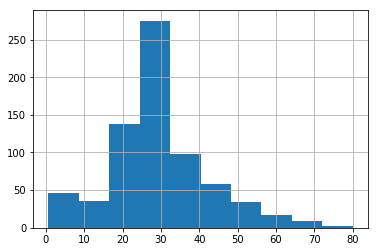

In [10]:
X_train['Age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4c1c9aa58>,
      dtype=object)

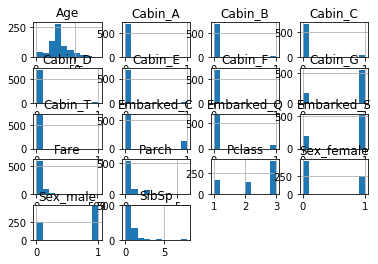

In [11]:
X_train.hist()

###To see descriptive statistics of the data

In [12]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


###Different Types of Distributions
- beta
- exponential
- normal_p
- normal_l
- bimodal

###Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed.
- Examples of such algorithm families include:
  - linear and logistic regression
  - nearest neighbors
  - neural networks
  - support vector machines with radial bias kernel functions
  - principal components analysis
  - linear discriminant analysis
- Few key terms for dealing with variance in data are:
  - Scaling
  - Standardization
  - Normalization

###Scaling using Scikit Learn

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
#X_train = scaler.fit_transform(X_train)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid),columns = X_valid.columns)

###Note about Scaling:
- StandardScaler is very effective if you need a relatively normal distribution.
- There are other scaling algorithms provided by Scikit which deal with outliers and other issues.
- Eg: RobustScaler is very effective for outliers.
- Strongly encourage to try out as many as possible.

###Fitting Logistic Regression to see improvement

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train, y_train)
y_pred = classifier.predict(X_valid)

#Performance Evaluation
from sklearn.metrics import accuracy_score
print("Accuracy is")
print(accuracy_score(y_valid, y_pred))

from sklearn.metrics import f1_score
print("F1 Score is")
f1_score(y_valid, y_pred)

Accuracy is
0.8156424581005587
F1 Score is


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7480916030534351

###Plotting Age Column Distribution


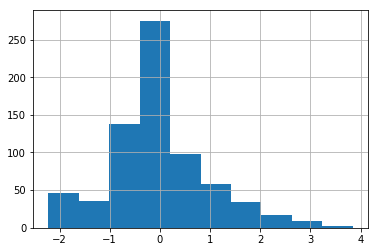

In [15]:
X_train['Age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bedd6390>,
      dtype=object)

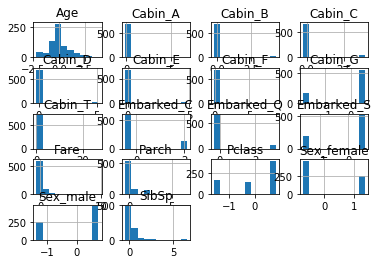

In [16]:
X_train.hist()

###Titanic Kaggle Challenge Inital Submission
- Link - https://www.kaggle.com/c/titanic
- You have written your results into output.csv
- This file is already in the format as required by the competetion
- Upload the file to the competition to see your ranking